In [201]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("./archive/Loan.csv")

In [202]:
# Feature selection
colonnes_utiles = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
    'LoanAmount', 'LoanDuration', 'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LoanApproved', 'RiskScore'
]

In [203]:
data = data[colonnes_utiles]
data

,Age,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,LoanDuration,DebtToIncomeRatio,PreviousLoanDefaults,LoanApproved,RiskScore
0,45,39948,617,Employed,13152,48,0.358336,0,0,49.0
1,38,39709,628,Employed,26045,48,0.330274,0,0,52.0
2,47,40724,570,Employed,17627,36,0.244729,0,0,52.0
3,58,69084,545,Employed,37898,96,0.436244,0,0,54.0
4,37,103264,594,Employed,9184,36,0.078884,0,1,36.0
...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,24521,36,0.468077,0,0,55.0
19996,56,49246,567,Employed,25818,36,0.317372,0,0,54.0
19997,44,48958,645,Employed,37033,72,0.023014,0,0,45.0
19998,60,41025,560,Employed,14760,72,0.534517,0,0,59.0


In [204]:
dataYes = data[data.LoanApproved == 1]
dataNo = data[data.LoanApproved == 0]

dataSample = pd.concat([dataYes.sample(n=1478), dataNo.sample(n=2000)])
dataSample = pd.get_dummies(dataSample, columns=['EmploymentStatus'])


In [205]:
# interprétation des données
dataSample.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,DebtToIncomeRatio,PreviousLoanDefaults,LoanApproved,RiskScore
count,3478.00000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,40.40368,69485.565842,575.579643,23416.315124,53.782634,0.286873,0.096032,0.424957,48.107188
std,11.26361,46317.775319,50.350738,12543.847555,24.779706,0.158379,0.294678,0.494408,8.319534
min,18.00000,15000.000000,343.000000,3674.000000,12.000000,0.003568,0.000000,0.000000,28.800000
25%,32.00000,35904.000000,544.000000,14669.500000,36.000000,0.161736,0.000000,0.000000,40.800000
50%,40.00000,56776.500000,582.000000,20596.000000,48.000000,0.267505,0.000000,0.000000,49.000000
75%,48.00000,90607.500000,612.000000,29139.000000,60.000000,0.395923,0.000000,1.000000,54.000000
max,78.00000,335901.000000,707.000000,158686.000000,120.000000,0.902253,1.000000,1.000000,77.000000


# Graphiques

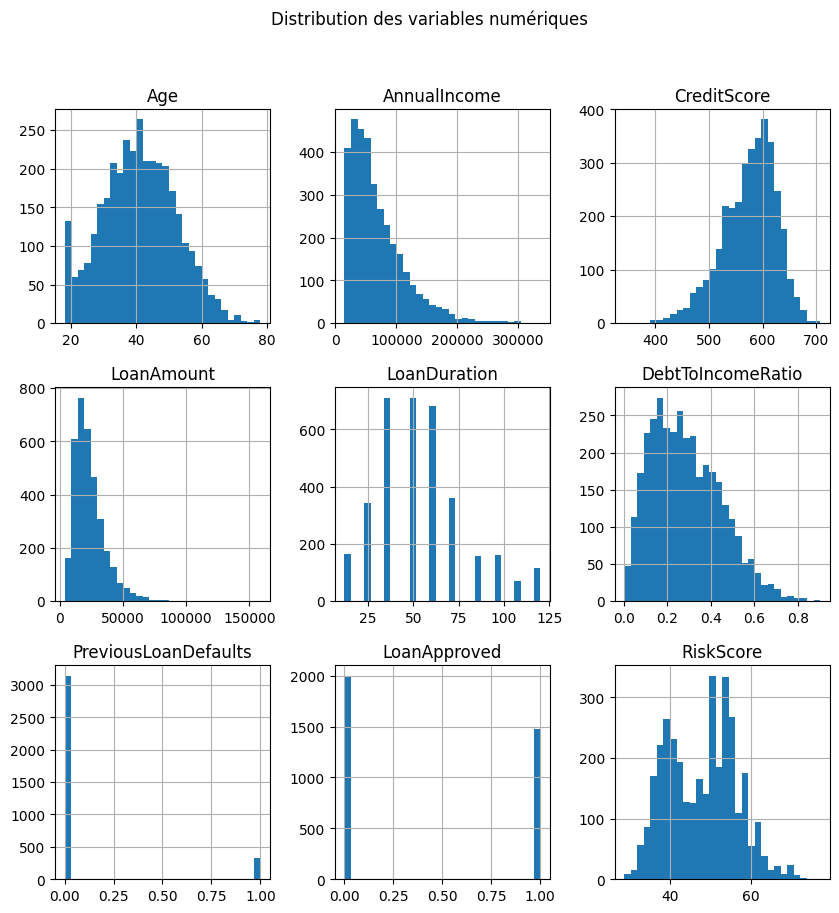

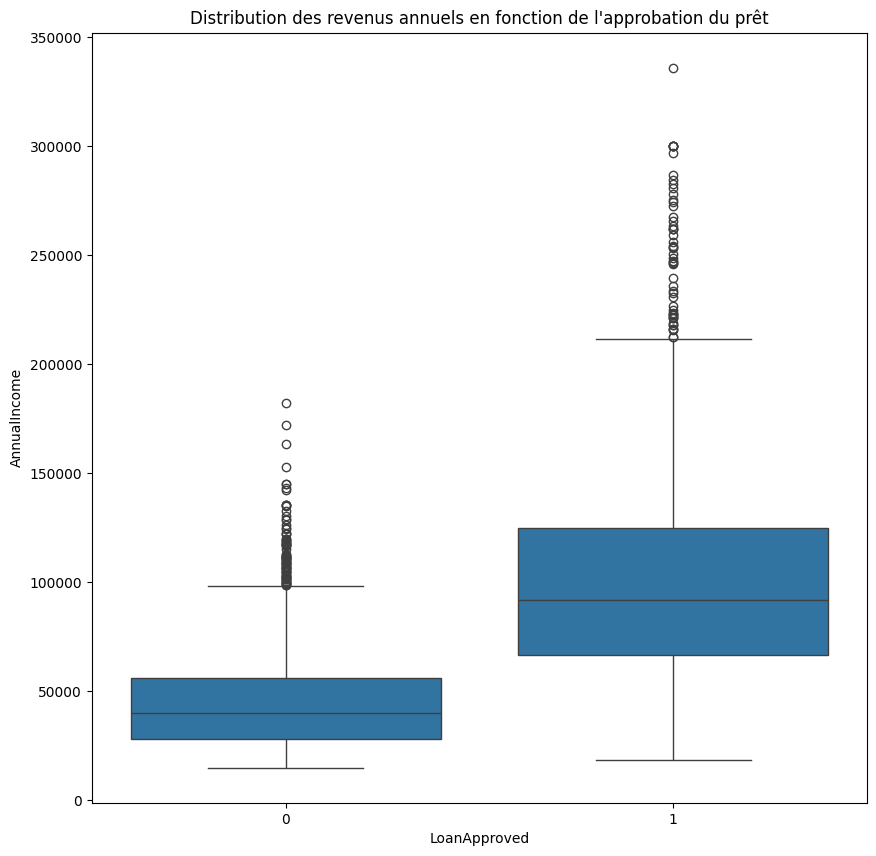

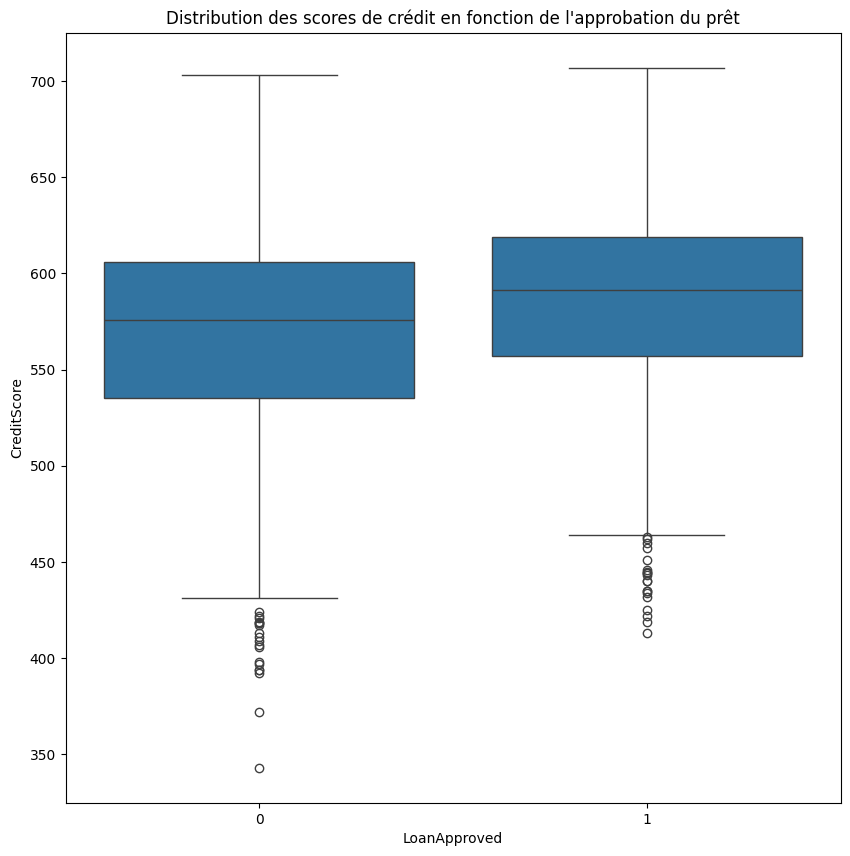

In [206]:
# Histogrammes
dataSample.hist(bins=30, figsize=(10, 10))
plt.suptitle('Distribution des variables numériques')
plt.show()

# Boxplots
plt.figure(figsize=(10, 10))
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=dataSample)
plt.title('Distribution des revenus annuels en fonction de l\'approbation du prêt')
plt.show()

plt.figure(figsize=(10, 10))
sns.boxplot(x='LoanApproved', y='CreditScore', data=dataSample)
plt.title('Distribution des scores de crédit en fonction de l\'approbation du prêt')
plt.show()

# on remarque ici que :
- LoanApproved est fortement corrélé positivement avec CreditScore : Plus le score de crédit est élevé, plus la probabilité d'obtenir un prêt est grande.
- LoanApproved est fortement corrélé négativement avec RiskScore : Plus le risque est élevé, moins la probabilité d'obtenir un prêt est grande.
- AnnualIncome est positivement corrélé avec LoanAmount : Les personnes avec des revenus plus élevés demandent généralement des prêts plus importants.
- LoanApproved est fortement corrélé négativement avec InterestRate : Les prêts accordés ont généralement des taux d'intérêt plus faibles.
- PreviousLoanDefaults est fortement corrélé négativement avec LoanApproved : Les personnes ayant des défauts de paiement précédents ont moins de chances d'obtenir un prêt.

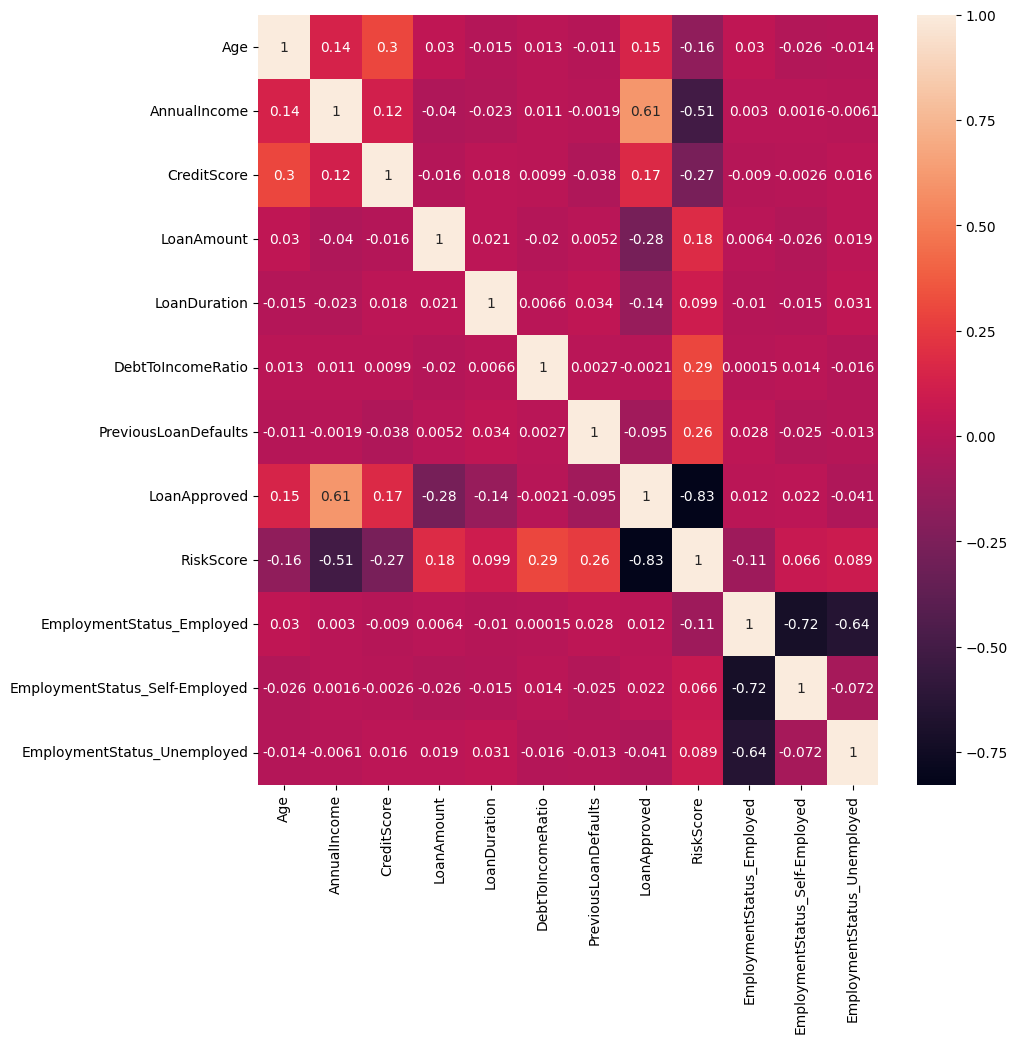

In [207]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

plt.figure(figsize=(10, 10))
sns.heatmap(dataSample.corr(), annot=True)
plt.show()



In [208]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



# Séparation des données en features et targetX = dataSample.drop(['LoanApproved', 'RiskScore'], axis=1)
y = dataSample['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Train the model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8347701149425287


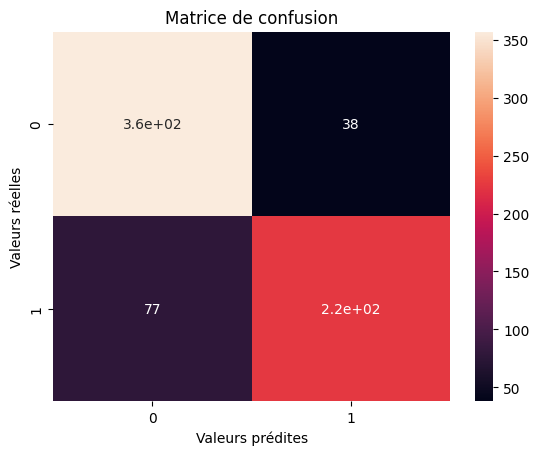

In [209]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Matrice de confusion')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

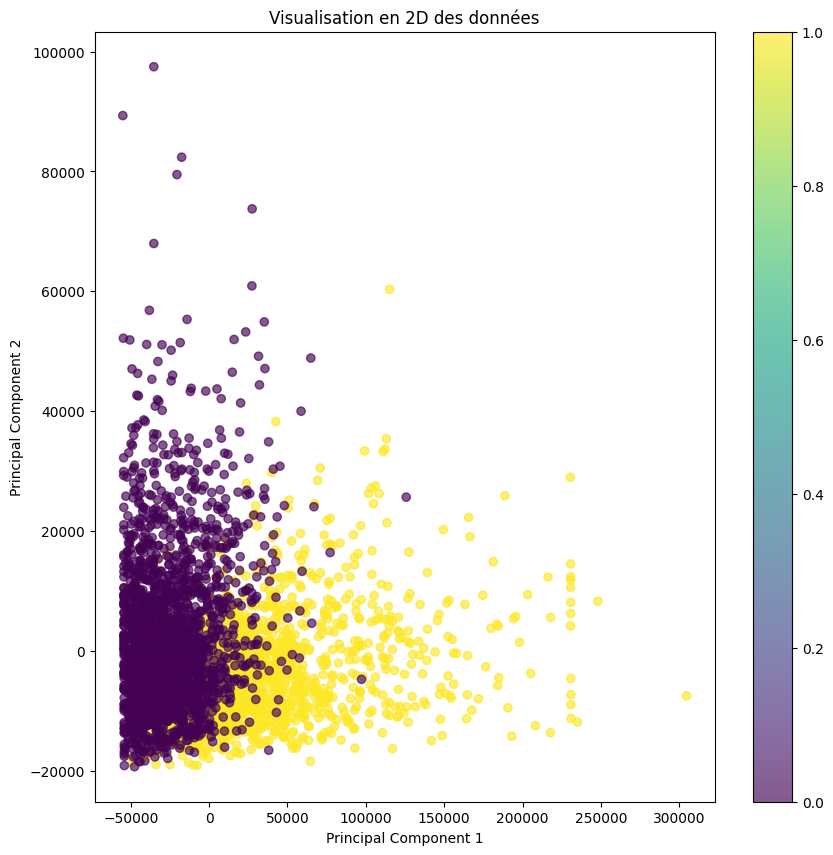

In [210]:
# Réduction de la dimensionnalité
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])


# Visualisation de l'ACP
plt.figure(figsize=(10,10))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=y, alpha=0.65)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisation en 2D des données')
plt.colorbar()
plt.show()

# Entrainement et tests

In [211]:
# Data preprocessing
dataSample = dataSample.dropna()

# Encoding categorical data
# dataSample['EmploymentStatus'] = labelencoder.fit_transform(dataSample['EmploymentStatus'])

# Split the dataset into training and testing sets
X = dataSample.drop(['LoanApproved','RiskScore'], axis=1)
y = dataSample['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")



Accuracy: 0.8189655172413793


In [212]:
# Après la séparation en X_train et X_test
scaler = StandardScaler()

# Ajuster le scaler sur les données d'entraînement et transformer X_train
X_train_scaled = scaler.fit_transform(X_train)

# Utiliser le scaler ajusté pour normaliser X_test
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle avec les données normalisées
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Prédictions avec les données normalisées
y_pred = classifier.predict(X_test_scaled)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy avec les données normalisées : {accuracy}")
# Création des données de test
data_test = pd.DataFrame({
    'Age': [25],
    'AnnualIncome': [50000],
    'CreditScore': [700],
    'EmploymentStatus': ['Employed'],
    'LoanAmount': [1000],
    'LoanDuration': [24],
    'DebtToIncomeRatio': [0.3],
    'PreviousLoanDefaults': [0],
})

# Encoder les données catégorielles
data_test = pd.get_dummies(data_test, columns=['EmploymentStatus'])
# Colonnes attendues par le modèle
colonnes_attendues = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
    'DebtToIncomeRatio', 'PreviousLoanDefaults', 
    'EmploymentStatus_Employed','EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed',
]
# Ajouter les colonnes manquantes avec des zéros
for col in colonnes_attendues:
    if col not in data_test.columns:
        data_test[col] = 0

# Réordonner les colonnes pour correspondre à l'ordre de celles de l'entraînement
data_test = data_test[colonnes_attendues]


# Normaliser les données de test avec le scaler ajusté
data_test_scaled = scaler.transform(data_test)

# Prédire avec le modèle entraîné
prediction = classifier.predict(data_test_scaled)

if prediction == 1:
    print("Le prêt sera approuvé")
else:
    print("Le prêt ne sera pas approuvé")

print(f"Prediction: {prediction}")


Accuracy avec les données normalisées : 0.8103448275862069
Le prêt ne sera pas approuvé
Prediction: [0]


# Nouveau test avec des ranges

In [213]:
# Créer des ranges pour l'âge
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
dataSample['AgeRange'] = pd.cut(dataSample['Age'], bins=age_bins, labels=age_labels)

# Créer des ranges pour le montant du prêt (LoanAmount)
loan_bins = [0, 5000, 10000, 20000, 50000, 100000, 500000]
loan_labels = ['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+']
dataSample['LoanAmountRange'] = pd.cut(dataSample['LoanAmount'], bins=loan_bins, labels=loan_labels)

# Créer des ranges pour le score de crédit (CreditScore)
credit_bins = [300, 500, 600, 700, 800, 900, 1000]
credit_labels = ['300-500', '500-600', '600-700', '700-800', '800-900', '900+']
dataSample['CreditScoreRange'] = pd.cut(dataSample['CreditScore'], bins=credit_bins, labels=credit_labels)

# Créer des ranges pour les revenus annuels (AnnualIncome)
income_bins = [0, 30000, 50000, 75000, 100000, 150000, 500000]
income_labels = ['0-30K', '30K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']
dataSample['AnnualIncomeRange'] = pd.cut(dataSample['AnnualIncome'], bins=income_bins, labels=income_labels)

# Afficher un aperçu du DataFrame avec les nouvelles colonnes
dataSample.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,DebtToIncomeRatio,PreviousLoanDefaults,LoanApproved,RiskScore,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,AgeRange,LoanAmountRange,CreditScoreRange,AnnualIncomeRange
9296,30,117723,589,36803,24,0.174616,0,1,33.6,True,False,False,25-35,20K-50K,500-600,100K-150K
373,51,87835,632,16563,48,0.458089,0,1,40.8,True,False,False,45-55,10K-20K,600-700,75K-100K
17533,52,120280,617,13596,36,0.040565,0,1,35.2,True,False,False,45-55,10K-20K,600-700,100K-150K
7571,40,64732,584,11430,48,0.227193,0,1,43.2,False,True,False,35-45,10K-20K,500-600,50K-75K
14449,53,144033,648,7336,60,0.131838,0,1,37.6,True,False,False,45-55,5K-10K,600-700,100K-150K


# Graphiques avec les nouvelles colonnes

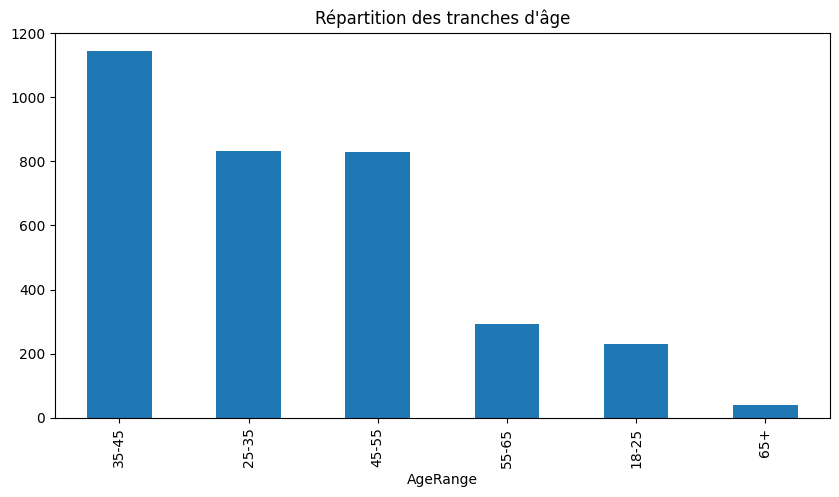

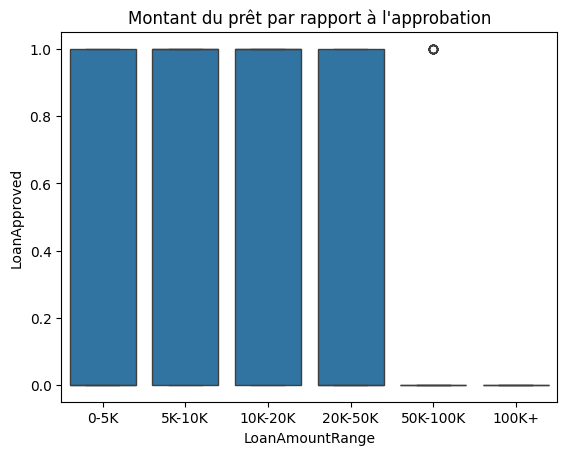

In [214]:
dataSample['AgeRange'].value_counts().plot(kind='bar', figsize=(10, 5), title='Répartition des tranches d\'âge')
plt.show()

sns.boxplot(x='LoanAmountRange', y='LoanApproved', data=dataSample)
plt.title('Montant du prêt par rapport à l\'approbation')
plt.show()

# Entrainement du modèle avec les nouvelles colonnes

Accuracy avec les ranges: 0.8160919540229885


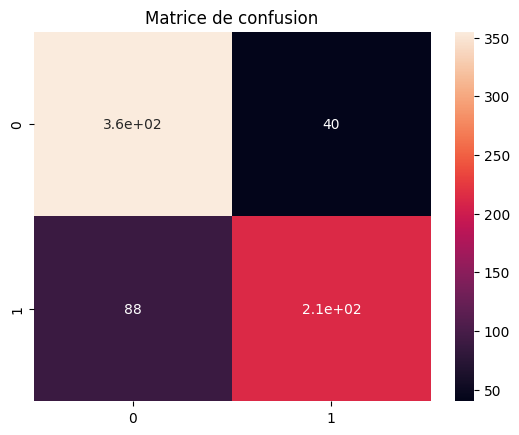

In [215]:
# Créer les features (en excluant les colonnes cibles LoanApproved et RiskScore)
X = pd.get_dummies(dataSample.drop(['LoanApproved', 'RiskScore'], axis=1))

# Target
y = dataSample['LoanApproved']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entraînement du modèle
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prédictions
y_pred = classifier.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy avec les ranges: {accuracy}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Matrice de confusion')
plt.show()

In [226]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler sur les données d'entraînement

# Normaliser les données d'entraînement
X_train_scaled = scaler.transform(X_train)

# Normaliser les données de test
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle avec les données normalisées
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Prédictions avec les données normalisées
y_pred = classifier.predict(X_test_scaled)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy avec les données normalisées et les ranges: {accuracy}")
# Créer les données de test
data_test = pd.DataFrame({
    'Age': [35],
    'AnnualIncome': [5000],
    'CreditScore': [300],
    'EmploymentStatus': ['Unemployed'],  # Doit correspondre aux valeurs connues par l'encodeur
    'LoanAmount': [10000],
    'LoanDuration': [12],
    'DebtToIncomeRatio': [0.3],
    'PreviousLoanDefaults': [0],
})

# Encoder les données catégorielles
data_test = pd.get_dummies(data_test, columns=['EmploymentStatus'])

# Ajouter les colonnes manquantes avec des zéros
for col in X.columns:
    if col not in data_test.columns:
        data_test[col] = 0

# Réordonner les colonnes pour correspondre à l'ordre de celles de l'entraînement
data_test = data_test[X.columns]

# Normaliser les données de test avec le scaler ajusté
data_test_scaled = scaler.transform(data_test)

# Prédire avec le modèle entraîné
prediction = classifier.predict(data_test_scaled)


if prediction == 1:
    print("Le prêt sera approuvé")
else:
    print("Le prêt ne sera pas approuvé")
print(f"Prediction: {prediction}")


Accuracy avec les données normalisées et les ranges: 0.6666666666666666
Le prêt sera approuvé
Prediction: [1]


# il y'a des resultats coherent pour le premier modele mais pour le deuxieme modele il rep que oui a part pour des trucs absurdes